## Import the required libraries

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read the files and describe about it.

In [5]:
df = pd.read_csv('stockmarket/BPCL.csv')

In [6]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,444.369977,445.014220,452.935686,436.630013,444.384065,444.377629,444.802256,2.093650e+06,9.323829e+13,55725.562704,8.673432e+05,0.443450
std,184.340340,184.491153,186.373754,182.706581,184.352843,184.338560,184.537444,4.462703e+06,1.927900e+14,47656.113461,2.283629e+06,0.150737
min,110.150000,113.900000,117.500000,106.250000,110.000000,110.150000,114.130000,2.297000e+03,6.755889e+10,427.000000,2.903000e+03,0.050500
25%,333.837500,334.000000,341.000000,326.387500,334.012500,333.837500,333.715000,4.136565e+05,1.647654e+13,24509.750000,2.305310e+05,0.333200
50%,393.400000,394.075000,400.825000,385.350000,393.100000,393.550000,392.680000,8.820490e+05,3.808395e+13,45158.500000,4.431750e+05,0.443800
75%,555.125000,555.750000,564.975000,544.987500,554.937500,555.125000,554.590000,2.040695e+06,1.140152e+14,71881.750000,9.883100e+05,0.547000
max,1133.300000,1132.200000,1156.000000,1120.100000,1132.100000,1133.300000,1137.040000,1.997910e+08,8.810053e+15,511790.000000,1.355721e+08,1.000000


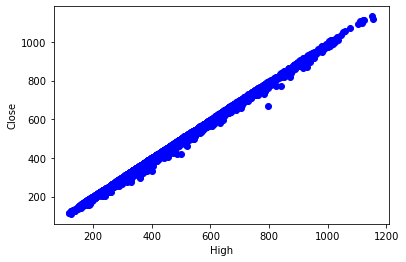

In [20]:
plt.scatter(df.High, df.Close,  color='blue')
plt.xlabel("High")
plt.ylabel("Close")
plt.show()

## Preparation For Testing and Training

In [21]:
x = df[['High', 'Low', 'Open', 'Volume']].values
y = df[['Close']].values

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [9]:
reg= LinearRegression()
reg.fit(x_train, y_train)

print(reg.coef_)

[[ 6.95323990e-01  7.27794876e-01 -4.23843745e-01  1.00496513e-08]]


In [10]:
print(reg.intercept_)
predicted = reg.predict(x_test)
print(predicted)

[0.27480055]
[[677.64522335]
 [339.80024973]
 [411.96391561]
 ...
 [348.43056823]
 [854.12355252]
 [198.96583801]]


### Difference b/w Actual & Predicted Values

In [11]:
dm= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predicted.flatten()})

In [13]:
dm.head(50)

,Actual,Predicted
0,672.00,677.645223
1,352.05,339.800250
2,409.75,411.963916
3,650.00,660.111853
4,271.15,275.437383
5,279.30,274.091194
6,654.40,655.282683
7,364.20,361.124516
8,419.55,419.091909
9,180.70,181.929255


In [14]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error:  3.2051017838926867
Mean Squared Error:  24.26863616081268
Root Mean Squared Error:  4.926320752936483


### Data Vizualization

<AxesSubplot:>

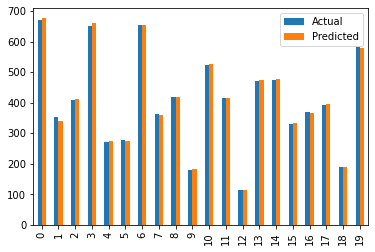

In [19]:
graph = dm.head(20)
graph.plot(kind='bar')